In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
destination_dir = os.path.join("2d")
os.makedirs(destination_dir, exist_ok=True)

In [3]:
def add_latlong(footprints):
    centroid = footprints.geometry.to_crs("EPSG:4326").centroid
    footprints['latitude'] = centroid.y
    footprints['longitude'] = centroid.x
    return pd.DataFrame(footprints.drop(columns="geometry"))

In [4]:
base_dir = os.path.join("data")
footprints = gpd.read_file(os.path.join(base_dir, "footprints.geojson"))

In [5]:
footprints

,bbl,bin,id,geometry
0,1007640007,1013712,31a2a,"POLYGON ((-74.00175 40.73959, -74.00198 40.739..."
1,3050830044,3116615,152a6,"POLYGON ((-73.95694 40.65323, -73.95697 40.653..."
2,2033180015,2017499,092e2,"POLYGON ((-73.89497 40.86948, -73.89522 40.869..."
3,3074040001,3202112,9b415,"POLYGON ((-73.95156 40.59440, -73.95161 40.594..."
4,3050580057,3116089,b753d,"POLYGON ((-73.96477 40.65203, -73.96484 40.652..."
...,...,...,...,...
9245,3017130007,3421590,8cbbd,"POLYGON ((-73.92297 40.67720, -73.92319 40.677..."
9246,1008280059,1015659,27520,"POLYGON ((-73.98952 40.74443, -73.98960 40.744..."
9247,2029410001,2114529,5830f,"POLYGON ((-73.89748 40.84026, -73.89814 40.840..."
9248,4098750001,4211112,2ec2a,"POLYGON ((-73.79462 40.71675, -73.79472 40.716..."


In [6]:
footprints_ll = add_latlong(footprints)

/home/thomas/miniconda3/envs/thermal/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [7]:
footprints_ll

,bbl,bin,id,latitude,longitude
0,1007640007,1013712,31a2a,40.739758,-74.001778
1,3050830044,3116615,152a6,40.653385,-73.956779
2,2033180015,2017499,092e2,40.869700,-73.895017
3,3074040001,3202112,9b415,40.594550,-73.951343
4,3050580057,3116089,b753d,40.652215,-73.964713
...,...,...,...,...,...
9245,3017130007,3421590,8cbbd,40.677413,-73.923052
9246,1008280059,1015659,27520,40.744560,-73.989475
9247,2029410001,2114529,5830f,40.840495,-73.897780
9248,4098750001,4211112,2ec2a,40.717143,-73.794127


In [8]:
data_dir = os.path.join(base_dir, "satellite_unique")

elevation_path = os.path.join(data_dir, "elevation.csv")
era5_land_path = os.path.join(data_dir, "era5_land.csv")
era5_path = os.path.join(data_dir, "era5.csv")
lst_path = os.path.join(data_dir, "lst.csv")
sentinel_2A_path = os.path.join(data_dir, "sentinel_2A.csv")
sentinel_1C_path = os.path.join(data_dir, "sentinel_1C.csv")
landsat_path = os.path.join(data_dir, "landsat8.csv")
viirs_path = os.path.join(data_dir, "viirs.csv")

In [9]:
elevation = pd.read_csv(elevation_path)

elevation.loc[:,"bbl"] = elevation.loc[:,"bbl"].astype(str)
elevation.loc[:,"bin"] = elevation.loc[:,"bin"].astype(str)

elevation_counts = elevation.groupby(['bbl','bin']).count().reset_index()

elevation_null = pd.merge(footprints_ll, elevation_counts, left_on=["bbl","bin"], right_on=["bbl","bin"])
elevation_null

,bbl,bin,id,latitude,longitude,elevation
0,1007640007,1013712,31a2a,40.739758,-74.001778,1
1,3050830044,3116615,152a6,40.653385,-73.956779,1
2,2033180015,2017499,092e2,40.869700,-73.895017,1
3,3074040001,3202112,9b415,40.594550,-73.951343,1
4,3050580057,3116089,b753d,40.652215,-73.964713,1
...,...,...,...,...,...,...
9245,3017130007,3421590,8cbbd,40.677413,-73.923052,1
9246,1008280059,1015659,27520,40.744560,-73.989475,1
9247,2029410001,2114529,5830f,40.840495,-73.897780,1
9248,4098750001,4211112,2ec2a,40.717143,-73.794127,1


In [10]:
# elevation_null.to_file(os.path.join(destination_dir, "elevation_counts.geojson"), driver="GeoJSON")

In [11]:
era5 = pd.read_csv(era5_path)

era5.loc[:,"bbl"] = era5.loc[:,"bbl"].astype(str)
era5.loc[:,"bin"] = era5.loc[:,"bin"].astype(str)

era5.loc[:,"date"] = pd.to_datetime(era5.date)
era5.loc[:,"month"] = era5.date.dt.month
era5.loc[:,"year"] = era5.date.dt.year
era5.head(3)

,bbl,bin,date,mean_2m_air_temperature,minimum_2m_air_temperature,maximum_2m_air_temperature,dewpoint_2m_temperature,total_precipitation,surface_pressure,mean_sea_level_pressure,u_component_of_wind_10m,v_component_of_wind_10m,month,year
0,1007640007,1013712,2018-01-01,271.787140,255.525620,289.121735,266.019714,0.078149,101327.625000,102253.250000,1.851955,-0.512473,1,2018
1,3050830044,3116615,2018-01-01,271.838043,254.907501,288.015198,266.663757,0.073549,102007.164062,102241.953125,1.721707,-0.435242,1,2018
2,2033180015,2017499,2018-01-01,271.396332,255.562424,288.285980,265.629211,0.079027,101002.234375,102234.062500,1.668592,-0.493059,1,2018


In [12]:
monthly_era5 = era5.groupby(['bbl','bin','year','month']).mean().reset_index()
era5_counts = monthly_era5.groupby(["bbl","bin"]).count().reset_index()
era5_counts

,bbl,bin,year,month,mean_2m_air_temperature,minimum_2m_air_temperature,maximum_2m_air_temperature,dewpoint_2m_temperature,total_precipitation,surface_pressure,mean_sea_level_pressure,u_component_of_wind_10m,v_component_of_wind_10m
0,1000020001,1085792,30,30,30,30,30,30,30,30,30,30,30
1,1000080039,1078968,30,30,30,30,30,30,30,30,30,30,30
2,1000080051,1090472,30,30,30,30,30,30,30,30,30,30,30
3,1000090001,1000018,30,30,30,30,30,30,30,30,30,30,30
4,1000090014,1000020,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,5078410154,5087579,30,30,30,30,30,30,30,30,30,30,30
9246,5078940001,5088090,30,30,30,30,30,30,30,30,30,30,30
9247,5078980001,5107854,30,30,30,30,30,30,30,30,30,30,30
9248,5079710250,5107860,30,30,30,30,30,30,30,30,30,30,30


In [13]:
era5_footprintscount = pd.merge(footprints_ll, era5_counts, left_on=["bbl","bin"], right_on=["bbl","bin"])
era5_footprintscount.to_csv(os.path.join(destination_dir, "era5_counts.csv"))
# era5_footprintscount.to_file(os.path.join(destination_dir, "era5_counts.geojson"), driver="GeoJSON")

In [14]:
# era5_land = pd.read_csv(era5_land_path)

# era5_land.loc[:,"bbl"] = era5_land.loc[:,"bbl"].astype(str)
# era5_land.loc[:,"bin"] = era5_land.loc[:,"bin"].astype(str)

# era5_land.loc[:,"date"] = pd.to_datetime(era5_land.date)
# era5_land.loc[:,"month"] = era5_land.date.dt.month
# era5_land.loc[:,"year"] = era5_land.date.dt.year
# era5_land.head(3)

In [15]:
# monthly_era5land = era5_land.groupby(['bbl','bin','year','month']).mean().reset_index()

In [16]:
# era5_land_counts = monthly_era5land.groupby(["bbl","bin"]).count().reset_index()[["bbl","bin","temperature_2m"]]
# era5_land_counts

In [17]:
# era5_land_footprintscount = pd.merge(footprints, era5_land_counts, left_on=["bbl","bin"], right_on=["bbl","bin"])
# era5_land_footprintscount.to_file(os.path.join(destination_dir, "era5_land_counts.geojson"), driver="GeoJSON")

In [18]:
# era5_land_footprintscount.temperature_2m.hist()
# plt.title("Frequency of temperature availability -era5")

In [19]:
# # Now thinking about LST
# lst = pd.read_csv(lst_path)

# lst.loc[:,"bbl"] = lst.loc[:,"bbl"].astype(str)
# lst.loc[:,"bin"] = lst.loc[:,"bin"].astype(str)

# lst.loc[:,"date"] = pd.to_datetime(lst.date)
# lst.loc[:,"month"] = lst.date.dt.month
# lst.loc[:,"year"] = lst.date.dt.year

# lst_monthly = lst.groupby(["bbl","bin","year","month"], dropna=False).mean().reset_index()

# # lst_null = pd.merge(footprints, lst_monthly, left_on=["bbl","bin"], right_on=["bbl","bin"])
# # lst_nullterms = lst_null[lst_null.isnull().any(axis=1)]

In [20]:
# lst_monthly

In [21]:
# lst_counts = lst_monthly.groupby(["bbl","bin"], dropna=False).count().reset_index().drop(columns=['year','month'])

In [22]:
# lst_counts

In [23]:
# lst_nullcounts = pd.merge(footprints, lst_counts, left_on=["bbl","bin"], right_on=["bbl","bin"])
# lst_nullcounts

In [24]:
# lst_nullcounts.to_file(os.path.join(destination_dir, "lst_counts.geojson"), driver="GeoJSON")

In [25]:
viirs = pd.read_csv(viirs_path)

viirs.loc[:,"bbl"] = viirs.loc[:,"bbl"].astype(str)
viirs.loc[:,"bin"] = viirs.loc[:,"bin"].astype(str)

viirs.loc[:,"date"] = pd.to_datetime(viirs.date)
viirs.loc[:,"month"] = viirs.date.dt.month
viirs.loc[:,"year"] = viirs.date.dt.year

viirs

,bbl,bin,date,avg_rad,cf_cvg,month,year
0,1007640007,1013712,2018-01-01,108.335547,11.346875,1,2018
1,3050830044,3116615,2018-01-01,53.679238,14.137729,1,2018
2,2033180015,2017499,2018-01-01,88.671643,12.030175,1,2018
3,3074040001,3202112,2018-01-01,40.342716,14.078403,1,2018
4,3050580057,3116089,2018-01-01,50.992780,14.000000,1,2018
...,...,...,...,...,...,...,...
332995,3017130007,3421590,2020-12-01,115.349383,9.000000,12,2020
332996,1008280059,1015659,2020-12-01,117.372896,8.627148,12,2020
332997,2029410001,2114529,2020-12-01,121.778479,9.000000,12,2020
332998,4098750001,4211112,2020-12-01,68.953659,10.000000,12,2020


In [26]:
viirs.groupby(['bbl','bin','date']).size().reset_index()[0].unique()

array([1])

In [27]:
viirs_counts = viirs.groupby(['bbl','bin']).count().reset_index()
viirs_counts

,bbl,bin,date,avg_rad,cf_cvg,month,year
0,1000020001,1085792,36,36,36,36,36
1,1000080039,1078968,36,36,36,36,36
2,1000080051,1090472,36,36,36,36,36
3,1000090001,1000018,36,36,36,36,36
4,1000090014,1000020,36,36,36,36,36
...,...,...,...,...,...,...,...
9245,5078410154,5087579,36,36,36,36,36
9246,5078940001,5088090,36,36,36,36,36
9247,5078980001,5107854,36,36,36,36,36
9248,5079710250,5107860,36,36,36,36,36


In [28]:
viirs_counts["avg_rad"].unique()

array([36])

In [29]:
viirs_footcounts = pd.merge(footprints_ll, viirs_counts, left_on=["bbl","bin"], right_on=["bbl","bin"])
viirs_footcounts.to_csv(os.path.join(destination_dir, "viirs_counts.csv"))

In [30]:
landsat = pd.read_csv(landsat_path)

landsat.loc[:,"bbl"] = landsat.loc[:,"bbl"].astype(str)
landsat.loc[:,"bin"] = landsat.loc[:,"bin"].astype(str)

landsat.loc[:,"date"] = pd.to_datetime(landsat.date)
landsat.loc[:,"month"] = landsat.date.dt.month
landsat.loc[:,"year"] = landsat.date.dt.year

landsat.head(3)

,bbl,bin,date,ST_B10,ST_QA,ST_ATRAN,ST_CDIST,ST_DRAD,ST_EMIS,ST_EMSD,...,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,NDVI,month,year
0,1007640007,1013712,2018-01-15 15:33:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018
1,3050830044,3116615,2018-01-15 15:33:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018
2,2033180015,2017499,2018-01-15 15:33:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018


In [31]:
landsat.groupby(['bbl','bin','date']).size().reset_index()[0].unique()

array([1])

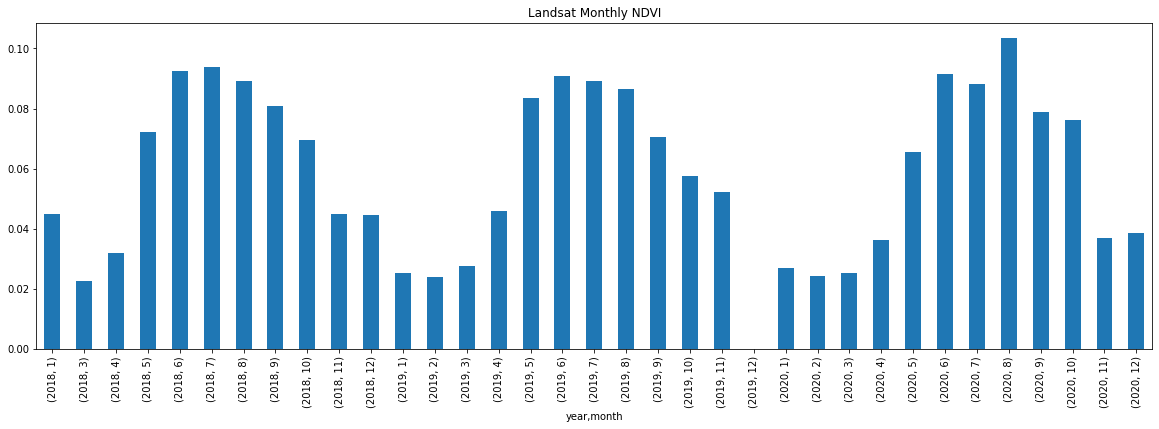

In [32]:
landsat.groupby(['year','month']).median()['NDVI'].plot(kind="bar", figsize=(20,6), title="Landsat Monthly NDVI")
plt.show()

In [33]:
landsat_monthly = landsat.groupby(['bbl','bin','year','month']).mean().reset_index()

In [34]:
landsat_monthly_bool = (landsat.groupby(['bbl','bin','year','month']).count() > 0).reset_index()[['bbl','bin','year','month','NDVI']]
landsat_monthly_bool['NDVI'] = landsat_monthly_bool['NDVI'].astype(int)
landsat_monthly_bool

,bbl,bin,year,month,NDVI
0,1000020001,1085792,2018,1,1
1,1000020001,1085792,2018,3,1
2,1000020001,1085792,2018,4,1
3,1000020001,1085792,2018,5,0
4,1000020001,1085792,2018,6,1
...,...,...,...,...,...
323745,5079910100,5088569,2020,8,0
323746,5079910100,5088569,2020,9,1
323747,5079910100,5088569,2020,10,1
323748,5079910100,5088569,2020,11,1


In [35]:
landsat_monthly_bool['NDVI'].mean()

0.8366486486486486

In [36]:
landsat_footcounts_monthly = pd.merge(footprints_ll, landsat_monthly_bool, left_on=["bbl","bin"], right_on=["bbl","bin"])
landsat_footcounts_monthly.to_csv(os.path.join(destination_dir, "landsat_counts_monthly.csv"))

In [37]:
landsat_counts = landsat.groupby(['bbl','bin']).count().reset_index()
landsat_counts

,bbl,bin,date,ST_B10,ST_QA,ST_ATRAN,ST_CDIST,ST_DRAD,ST_EMIS,ST_EMSD,...,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,NDVI,month,year
0,1000020001,1085792,166,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,166,166
1,1000080039,1078968,166,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,166,166
2,1000080051,1090472,166,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,166,166
3,1000090001,1000018,166,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,166,166
4,1000090014,1000020,166,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,166,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,5078410154,5087579,166,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,166,166
9246,5078940001,5088090,166,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,166,166
9247,5078980001,5107854,166,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,166,166
9248,5079710250,5107860,166,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,166,166


Text(0.5, 1.0, 'Histogram of Samples per building')

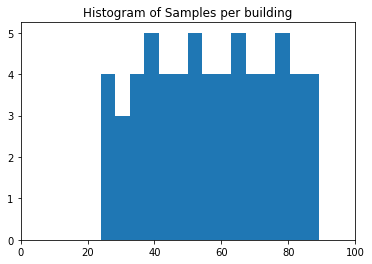

In [38]:
plt.hist(landsat_counts["ST_B10"].unique(), bins=15)
plt.xlim(0,100)
plt.title("Histogram of Samples per building")

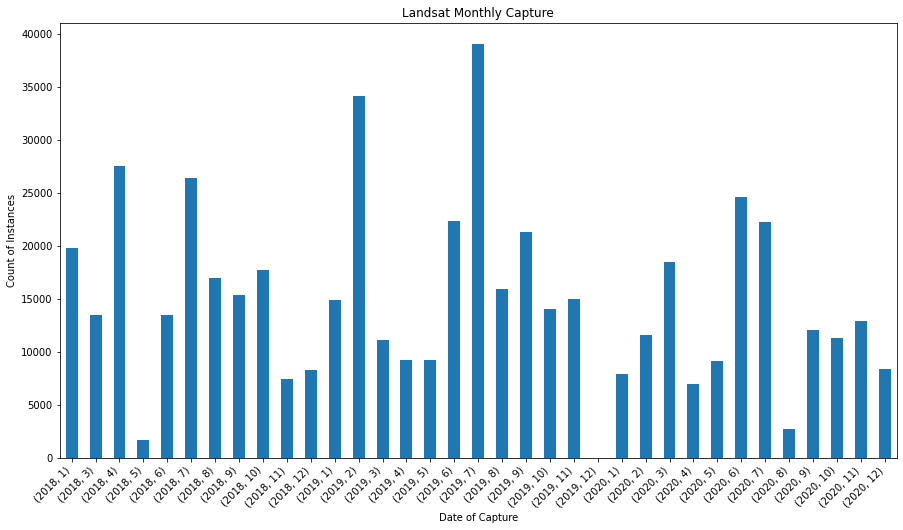

In [39]:
landsat[["date","ST_B10"]].groupby([landsat["date"].dt.year, landsat["date"].dt.month]).count()["ST_B10"].plot(kind="bar", figsize=(15,8), title="Landsat Monthly Capture")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Date of Capture")
plt.ylabel("Count of Instances")
plt.show()

In [40]:
landsat_counts['percent_found'] = landsat_counts['ST_B10'] / landsat_counts['month']
landsat_counts

,bbl,bin,date,ST_B10,ST_QA,ST_ATRAN,ST_CDIST,ST_DRAD,ST_EMIS,ST_EMSD,...,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,NDVI,month,year,percent_found
0,1000020001,1085792,166,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,166,166,0.289157
1,1000080039,1078968,166,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,166,166,0.271084
2,1000080051,1090472,166,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,166,166,0.271084
3,1000090001,1000018,166,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,166,166,0.283133
4,1000090014,1000020,166,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,166,166,0.289157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,5078410154,5087579,166,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,166,166,0.361446
9246,5078940001,5088090,166,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,166,166,0.367470
9247,5078980001,5107854,166,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,166,166,0.367470
9248,5079710250,5107860,166,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,166,166,0.355422


In [41]:
landsat_footcounts = pd.merge(footprints_ll, landsat_counts, left_on=["bbl","bin"], right_on=["bbl","bin"])
landsat_footcounts.to_csv(os.path.join(destination_dir, "landsat_counts.csv"))

In [42]:
sentinel_1C = pd.read_csv(sentinel_1C_path)

sentinel_1C.loc[:,"bbl"] = sentinel_1C.loc[:,"bbl"].astype(str)
sentinel_1C.loc[:,"bin"] = sentinel_1C.loc[:,"bin"].astype(str)

sentinel_1C.loc[:,"date"] = pd.to_datetime(sentinel_1C.date)
sentinel_1C.loc[:,"month"] = sentinel_1C.date.dt.month
sentinel_1C.loc[:,"year"] = sentinel_1C.date.dt.year

sentinel_1C.head(3)

,bbl,bin,date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,month,year
0,1007640007,1013712,2018-01-01 16:01:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018
1,3050830044,3116615,2018-01-01 16:01:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018
2,2033180015,2017499,2018-01-01 16:01:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018


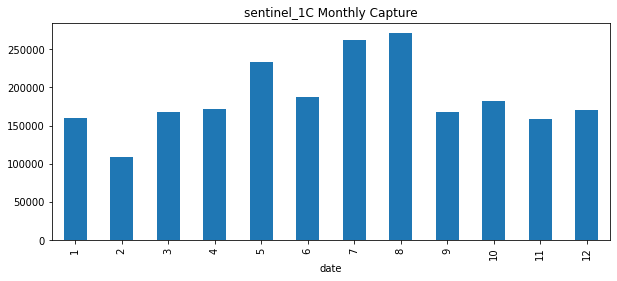

In [43]:
sentinel_1C[["date","B1"]].groupby([sentinel_1C["date"].dt.month]).count()["B1"].plot(kind="bar", figsize=(10,4), title="sentinel_1C Monthly Capture")
plt.show()

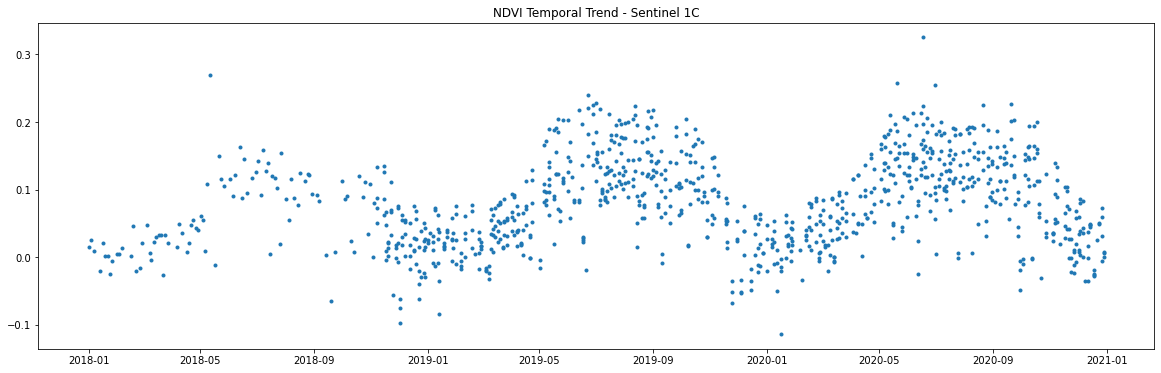

In [44]:
b1 = sentinel_1C[["date","NDVI"]]
b1 = b1.dropna().reset_index().drop(columns={"index"})

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(b1.groupby('date').mean(), '.')
plt.title("NDVI Temporal Trend - Sentinel 1C")
plt.show()

In [45]:
b1

,date,NDVI
0,2018-01-01 16:01:22,0.029604
1,2018-01-01 16:01:22,0.046086
2,2018-01-01 16:01:22,0.057304
3,2018-01-01 16:01:22,0.041464
4,2018-01-01 16:01:22,0.053054
...,...,...
2239397,2020-12-28 15:51:45,-0.011546
2239398,2020-12-28 15:51:45,0.027745
2239399,2020-12-28 15:51:45,-0.021700
2239400,2020-12-28 15:51:45,-0.004148


<AxesSubplot:>

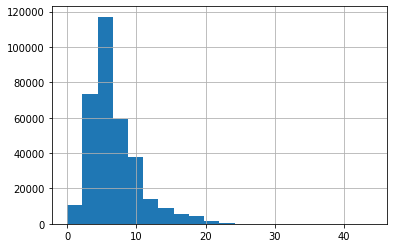

In [46]:
sentinel_1C.groupby(['bbl','bin','year','month']).count()['NDVI'].hist(bins=20)

In [47]:
s1c_counts = sentinel_1C.groupby(['bbl','bin','year','month']).count()

In [48]:
# so somehow everything is included here
len((sentinel_1C['bbl'] + sentinel_1C['bin']).unique())

9250

In [49]:
len((sentinel_1C['bbl'] + sentinel_1C['bin']).unique()) * 3 * 12

333000

In [50]:
sorted(s1c_counts.loc[:,'date'].unique())

[40, 44, 48, 50, 52, 56]

In [51]:
sentinel_1C_monthly_bool = (s1c_counts > 0).reset_index()[['bbl','bin','year','month','NDVI']]
sentinel_1C_monthly_bool['NDVI'] = sentinel_1C_monthly_bool['NDVI'].astype(int)
sentinel_1C_monthly_bool = sentinel_1C_monthly_bool.rename(columns={"NDVI":"1C"})
sentinel_1C_monthly_bool

,bbl,bin,year,month,1C
0,1000020001,1085792,2018,1,1
1,1000020001,1085792,2018,2,1
2,1000020001,1085792,2018,3,1
3,1000020001,1085792,2018,4,1
4,1000020001,1085792,2018,5,1
...,...,...,...,...,...
332995,5079910100,5088569,2020,8,1
332996,5079910100,5088569,2020,9,1
332997,5079910100,5088569,2020,10,1
332998,5079910100,5088569,2020,11,1


In [52]:
sentinel_1C_monthly_bool['1C'].mean()

0.999981981981982

In [53]:
sentinel_1C_footcounts_monthly = pd.merge(footprints_ll, sentinel_1C_monthly_bool, left_on=["bbl","bin"], right_on=["bbl","bin"])
sentinel_1C_footcounts_monthly.to_csv(os.path.join(destination_dir, "sentinel_1C_counts_monthly.csv"))

In [54]:
sentinel_2A = pd.read_csv(sentinel_2A_path)

sentinel_2A.loc[:,"bbl"] = sentinel_2A.loc[:,"bbl"].astype(str)
sentinel_2A.loc[:,"bin"] = sentinel_2A.loc[:,"bin"].astype(str)

sentinel_2A.loc[:,"date"] = pd.to_datetime(sentinel_2A.date)
sentinel_2A.loc[:,"month"] = sentinel_2A.date.dt.month
sentinel_2A.loc[:,"year"] = sentinel_2A.date.dt.year

sentinel_2A.head(3)

,bbl,bin,date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,month,year
0,1007640007,1013712,2018-12-14 15:51:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2018
1,3050830044,3116615,2018-12-14 15:51:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2018
2,2033180015,2017499,2018-12-14 15:51:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2018


In [55]:
len((sentinel_2A['bbl'] + sentinel_2A['bin']).unique()) * 3 * 12

333000

In [56]:
s2a_counts = sentinel_2A.groupby(['bbl','bin','year','month']).count()
len(s2a_counts)

231250

In [57]:
sentinel_2A_monthly_bool = (sentinel_2A.groupby(['bbl','bin','year','month']).count() > 0).reset_index()[['bbl','bin','year','month','NDVI']]
sentinel_2A_monthly_bool['NDVI'] = sentinel_2A_monthly_bool['NDVI'].astype(int)
sentinel_2A_monthly_bool = sentinel_2A_monthly_bool.rename(columns={"NDVI":"2A"})
sentinel_2A_monthly_bool

,bbl,bin,year,month,2A
0,1000020001,1085792,2018,12,1
1,1000020001,1085792,2019,1,1
2,1000020001,1085792,2019,2,0
3,1000020001,1085792,2019,3,1
4,1000020001,1085792,2019,4,1
...,...,...,...,...,...
231245,5079910100,5088569,2020,8,1
231246,5079910100,5088569,2020,9,1
231247,5079910100,5088569,2020,10,1
231248,5079910100,5088569,2020,11,0


In [58]:
sentinel_total_bool = sentinel_1C_monthly_bool.merge(
    sentinel_2A_monthly_bool, 
    left_on=["bbl","bin","year","month"],
    right_on=["bbl","bin","year","month"],
    how="left"
).fillna(0)

In [59]:
sentinel_total_bool

,bbl,bin,year,month,1C,2A
0,1000020001,1085792,2018,1,1,0.0
1,1000020001,1085792,2018,2,1,0.0
2,1000020001,1085792,2018,3,1,0.0
3,1000020001,1085792,2018,4,1,0.0
4,1000020001,1085792,2018,5,1,0.0
...,...,...,...,...,...,...
332995,5079910100,5088569,2020,8,1,1.0
332996,5079910100,5088569,2020,9,1,1.0
332997,5079910100,5088569,2020,10,1,1.0
332998,5079910100,5088569,2020,11,1,0.0


In [60]:
sentinel_total_bool['1C'].mean()

0.999981981981982

In [61]:
sentinel_total_bool['2A'].mean()

0.17928528528528528

In [62]:
sentinel_footcounts_monthly = pd.merge(footprints_ll, sentinel_total_bool, left_on=["bbl","bin"], right_on=["bbl","bin"])
sentinel_footcounts_monthly.to_csv(os.path.join(destination_dir, "sentinel_counts_monthly.csv"))

In [63]:
sentinel_2A.groupby(['year','month']).mean()

B1          B2           B3           B4           B5  \
year month                                                                  
2018 12     366.890296  474.257977   669.791987   713.175710  1105.460265   
2019 1      283.669683  400.008886   617.465586   689.473221  1047.557866   
     2      128.061669  311.512021   564.544378   694.306952  1098.241998   
     3      457.725369  546.913049   791.604955   916.170830  1341.641245   
     4      587.736324  560.587508   808.992238   802.469543  1233.485397   
     5      799.206412  780.180970   987.765898   898.966353  1305.302635   
     6      885.754437  840.141623  1022.934260   957.348050  1327.254342   
     7      879.833092  833.048621   984.920866   914.361023  1256.584740   
     8      768.250755  727.865706   890.727666   836.190329  1154.991798   
     9      713.715490  674.111737   814.196549   762.241744  1063.607400   
     10     502.736591  513.561306   668.794393   642.032352   950.786251   
     11     444.718043  454.320010   609.939419   615.729910   949.681781   
     12     242.449353  389.011563   586.442197   657.550764  1028.405382   
2020 1      413.810836  511.282068   715.834322   787.863431  1187.223148   
     2      404.063544  466.894946   679.605220   761.009263  1125.918829   
     3      486.280060  541.476628   741.876787   789.708541  1167.490895   
     4      617.386307  645.725492   842.630819   817.858376  1240.701757   
     5      820.113960  776.650223  1031.386289   939.568603  1405.168395   
     6      972.933433  912.430905  1108.432414  1050.889557  1431.534176   
     7      893.827530  844.528755  1014.140276   964.895808  1306.156396   
     8      821.603035  772.791674   938.671734   879.272329  1211.786407   
     9      670.722037  654.048718   819.214433   756.222141  1074.540743   
     10     550.554917  520.668428   697.714654   663.259657   994.944337   
     11     409.479462  453.995583   629.649458   645.923401  1012.767636   
     12     398.427884  441.760766   669.325024   693.071578  1064.515142   

                     B6           B7           B8          B8A           B9  \
year month                                                                    
2018 12     1788.623335  2014.399389  2271.544527  2263.221912  2145.778932   
2019 1      1690.233044  1911.793309  2184.571110  2172.754187  2067.139284   
     2      1725.436658  1967.199268  2342.863524  2327.722801  2229.458386   
     3      2052.821389  2310.310244  2617.022706  2601.749515  2428.161018   
     4      1991.858313  2208.541357  2349.175411  2384.913770  2282.142064   
     5      2209.444291  2466.214536  2546.433208  2573.410041  2534.696143   
     6      2404.851597  2770.517927  2820.544952  2894.564955  2844.862453   
     7      2238.497112  2615.106194  2592.702103  2757.936723  2673.779212   
     8      2069.986948  2390.644347  2443.112033  2524.118018  2483.409319   
     9      1859.509284  2135.481440  2204.291793  2277.310334  2245.968346   
     10     1664.179621  1887.612383  2027.235478  2038.715091  2019.598156   
     11     1569.479999  1766.565454  1952.115234  1957.527019  1925.262026   
     12     1709.297122  1937.935579  2230.793579  2197.096863  2149.018613   
2020 1      1881.465428  2118.888295  2373.900111  2388.117788  2332.425033   
     2      1801.077414  2033.657602  2319.821202  2276.733312  2055.915354   
     3      1928.590265  2169.580604  2397.559582  2370.537526  2249.818625   
     4      2051.814377  2291.116457  2503.185381  2460.819495  2338.837166   
     5      2365.557775  2614.339888  2724.139266  2738.811863  2676.447986   
     6      2492.332551  2839.578617  2865.079933  2960.662066  2915.497594   
     7      2282.685318  2638.801893  2617.588113  2767.617824  2690.182388   
     8      2151.255629  2492.119892  2494.471169  2636.228190  2576.269732   
     9      1970.965590  2272.288069  2374.202457  2429.863257  2380.927295   
     10     1754.907130  1986.902999  2111.2

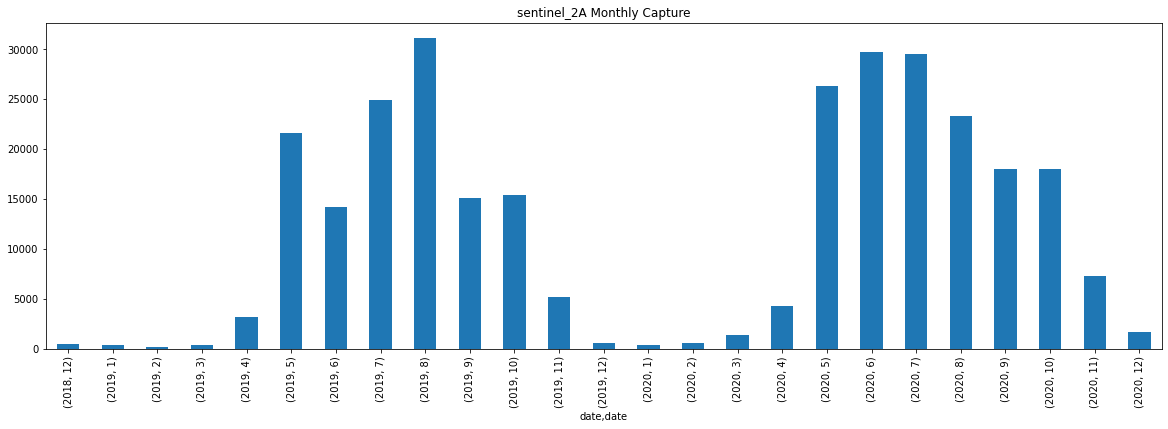

In [64]:
sentinel_2A[["date","B1"]].groupby([sentinel_2A["date"].dt.year, sentinel_2A["date"].dt.month]).count()["B1"].plot(kind="bar", figsize=(20,6), title="sentinel_2A Monthly Capture")
plt.show()

In [65]:
# this is strange... I wonder if it has to do with cloud coverage over more urban regions during the winter months artificially expanding the count of vegetation during the winter

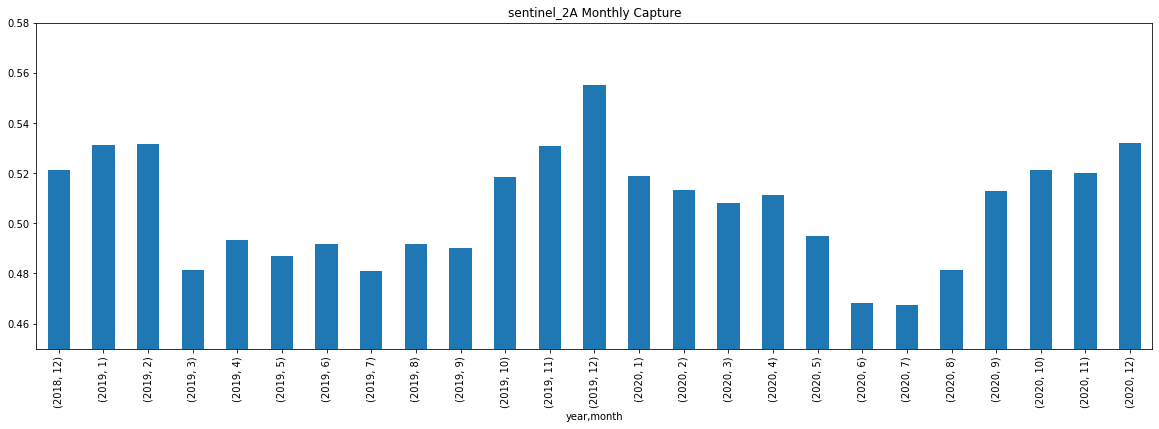

In [66]:
sentinel_2A.groupby(['year','month']).median()['NDVI'].plot(kind="bar", figsize=(20,6), title="sentinel_2A Monthly Capture")
plt.ylim(0.45,0.58)
plt.show()

In [67]:
landsat_ndvi = landsat.groupby(['year','month']).median()['NDVI']
landsat_ndvi

year  month
2018  1        0.044991
      3        0.022640
      4        0.031741
      5        0.072324
      6        0.092509
      7        0.093968
      8        0.089214
      9        0.080866
      10       0.069427
      11       0.045017
      12       0.044459
2019  1        0.025248
      2        0.023928
      3        0.027523
      4        0.045785
      5        0.083605
      6        0.090865
      7        0.089257
      8        0.086645
      9        0.070669
      10       0.057483
      11       0.052246
      12            NaN
2020  1        0.026933
      2        0.024057
      3        0.025223
      4        0.036072
      5        0.065456
      6        0.091405
      7        0.088281
      8        0.103481
      9        0.078846
      10       0.076061
      11       0.036900
      12       0.038644
Name: NDVI, dtype: float64

In [68]:
agg_function = 'mean'

landsat_ndvi = landsat.groupby(['year','month']).agg(agg_function)['NDVI']
sentinel_2A_ndvi = sentinel_2A.groupby(['year','month']).agg(agg_function)['NDVI']
sentinel_1C_ndvi = sentinel_1C.groupby(['year','month']).agg(agg_function)['NDVI']

In [69]:
monthly_ndvi = pd.DataFrame({"Landsat": landsat_ndvi, "Sentinel-2A": sentinel_2A_ndvi, "Sentinel-1C": sentinel_1C_ndvi})
monthly_ndvi

Landsat  Sentinel-2A  Sentinel-1C
year month                                    
2018 1      0.055288          NaN     0.001961
     2           NaN          NaN     0.013353
     3      0.027354          NaN     0.021937
     4      0.038148          NaN     0.043119
     5      0.082370          NaN     0.090463
     6      0.102195          NaN     0.123435
     7      0.101359          NaN     0.125276
     8      0.096111          NaN     0.104807
     9      0.090253          NaN     0.095416
     10     0.077940          NaN     0.096403
     11     0.055541          NaN     0.039064
     12     0.053006     0.517861    -0.007548
2019 1      0.030748     0.519557    -0.011343
     2      0.028999     0.550262     0.009142
     3      0.031377     0.479863     0.020531
     4      0.054273     0.490103     0.040537
     5      0.092366     0.484578     0.109216
     6      0.099964     0.495806     0.135782
     7      0.097451     0.481857     0.108235
     8      0.094662     0.495334     0.117153
     9      0.078766     0.492314     0.092408
     10     0.066005     0.523740     0.098210
     11     0.060074     0.522517     0.059603
     12          NaN     0.541726    -0.000858
2020 1      0.034685     0.501726    -0.006939
     2      0.029801     0.503563     0.020358
     3      0.031294     0.502504     0.029957
     4      0.043578     0.506692     0.061380
     5      0.074755     0.491414     0.111556
     6      0.101092     0.469604     0.125992
     7      0.096143     0.470019     0.114650
     8      0.116467     0.481946     0.114027
     9      0.084108     0.517057     0.112188
     10     0.083718     0.525296     0.100834
     11     0.045257     0.511937     0.034091
     12     0.047888     0.525850    -0.005667

183.60035933576188


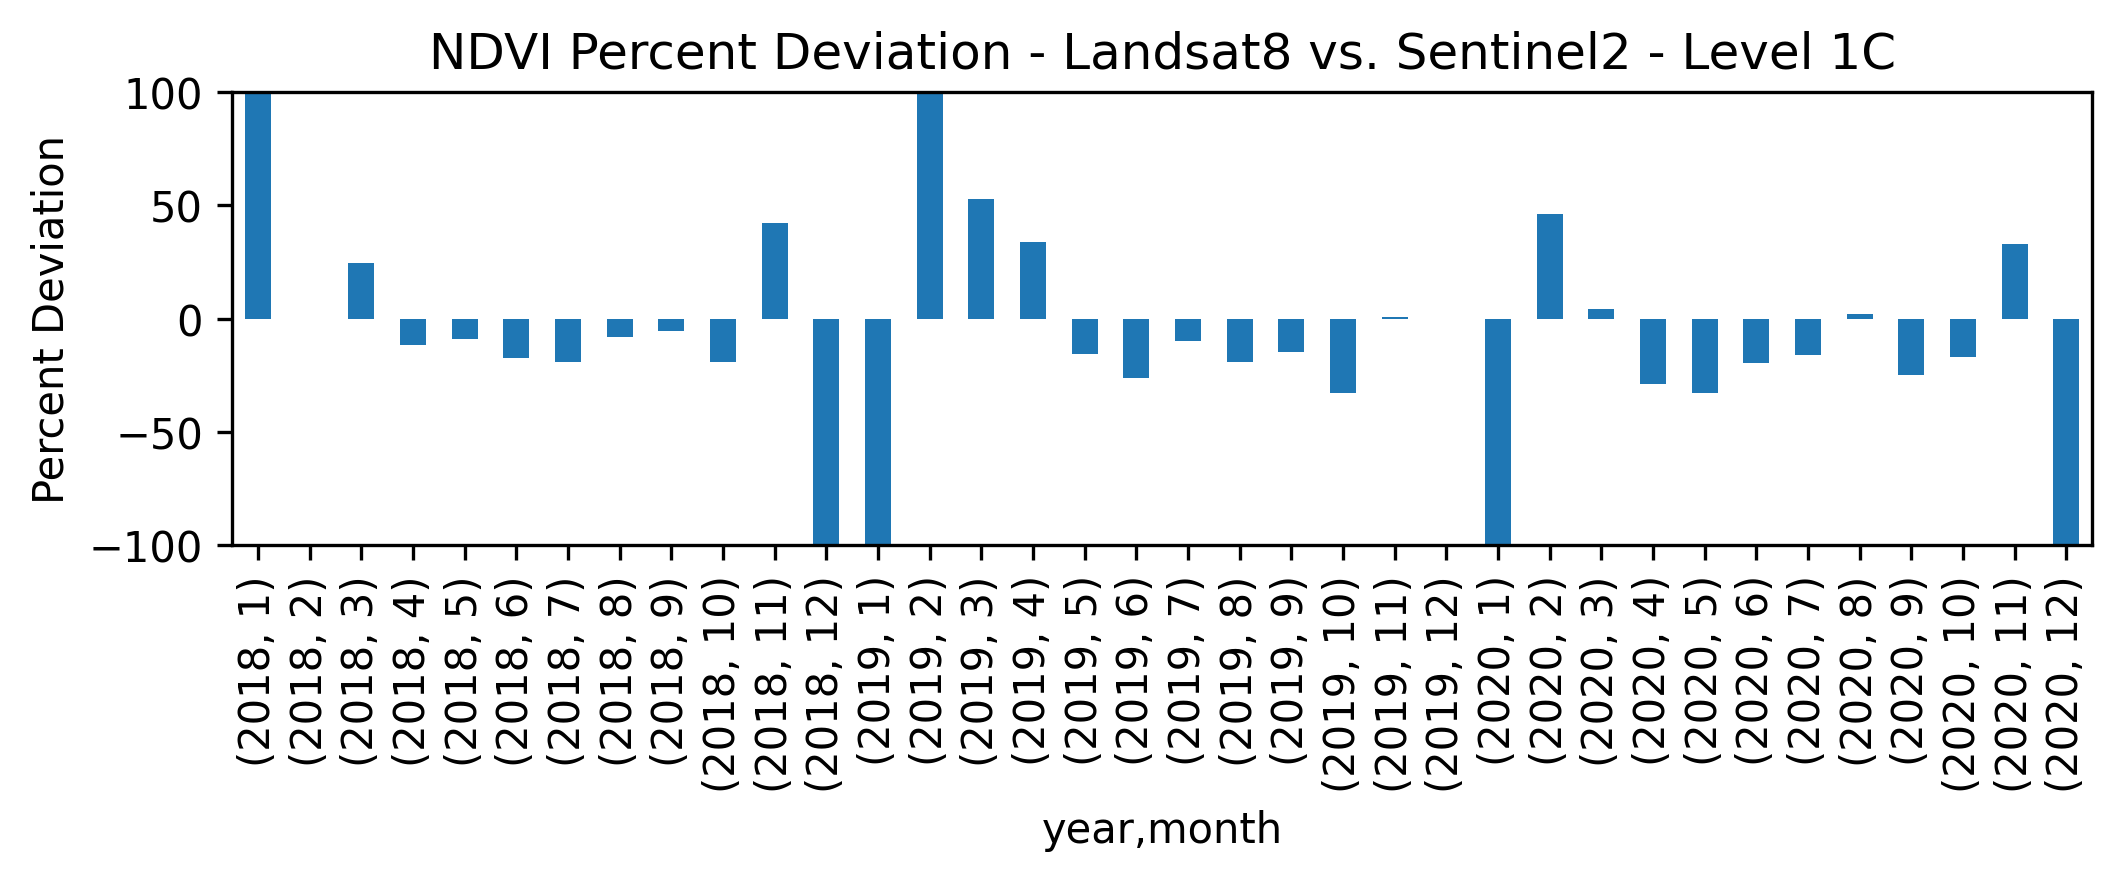

In [70]:
difference = 100 * ((monthly_ndvi['Landsat'] - monthly_ndvi['Sentinel-1C']) / monthly_ndvi['Sentinel-1C'])
print(np.abs(difference).mean())

plt.figure(figsize=(8, 2), dpi=300)
difference.plot(kind='bar')
plt.xticks(rotation=90, ha='center')
plt.ylabel("Percent Deviation")
plt.ylim(-100,100)
plt.title("NDVI Percent Deviation - Landsat8 vs. Sentinel2 - Level 1C")
plt.savefig('2d/landsat_sentinel_ndvi.png',bbox_inches="tight")
plt.show()

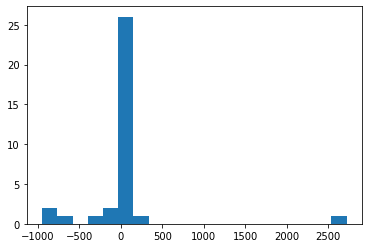

In [71]:
plt.hist(difference, bins=20)
plt.show()

In [72]:
np.abs((monthly_ndvi['Sentinel-1C'] / monthly_ndvi['Landsat'])).mean()

0.9393172241621476

In [73]:
monthly_ndvi.reset_index().to_csv("monthly_ndvidata.csv")

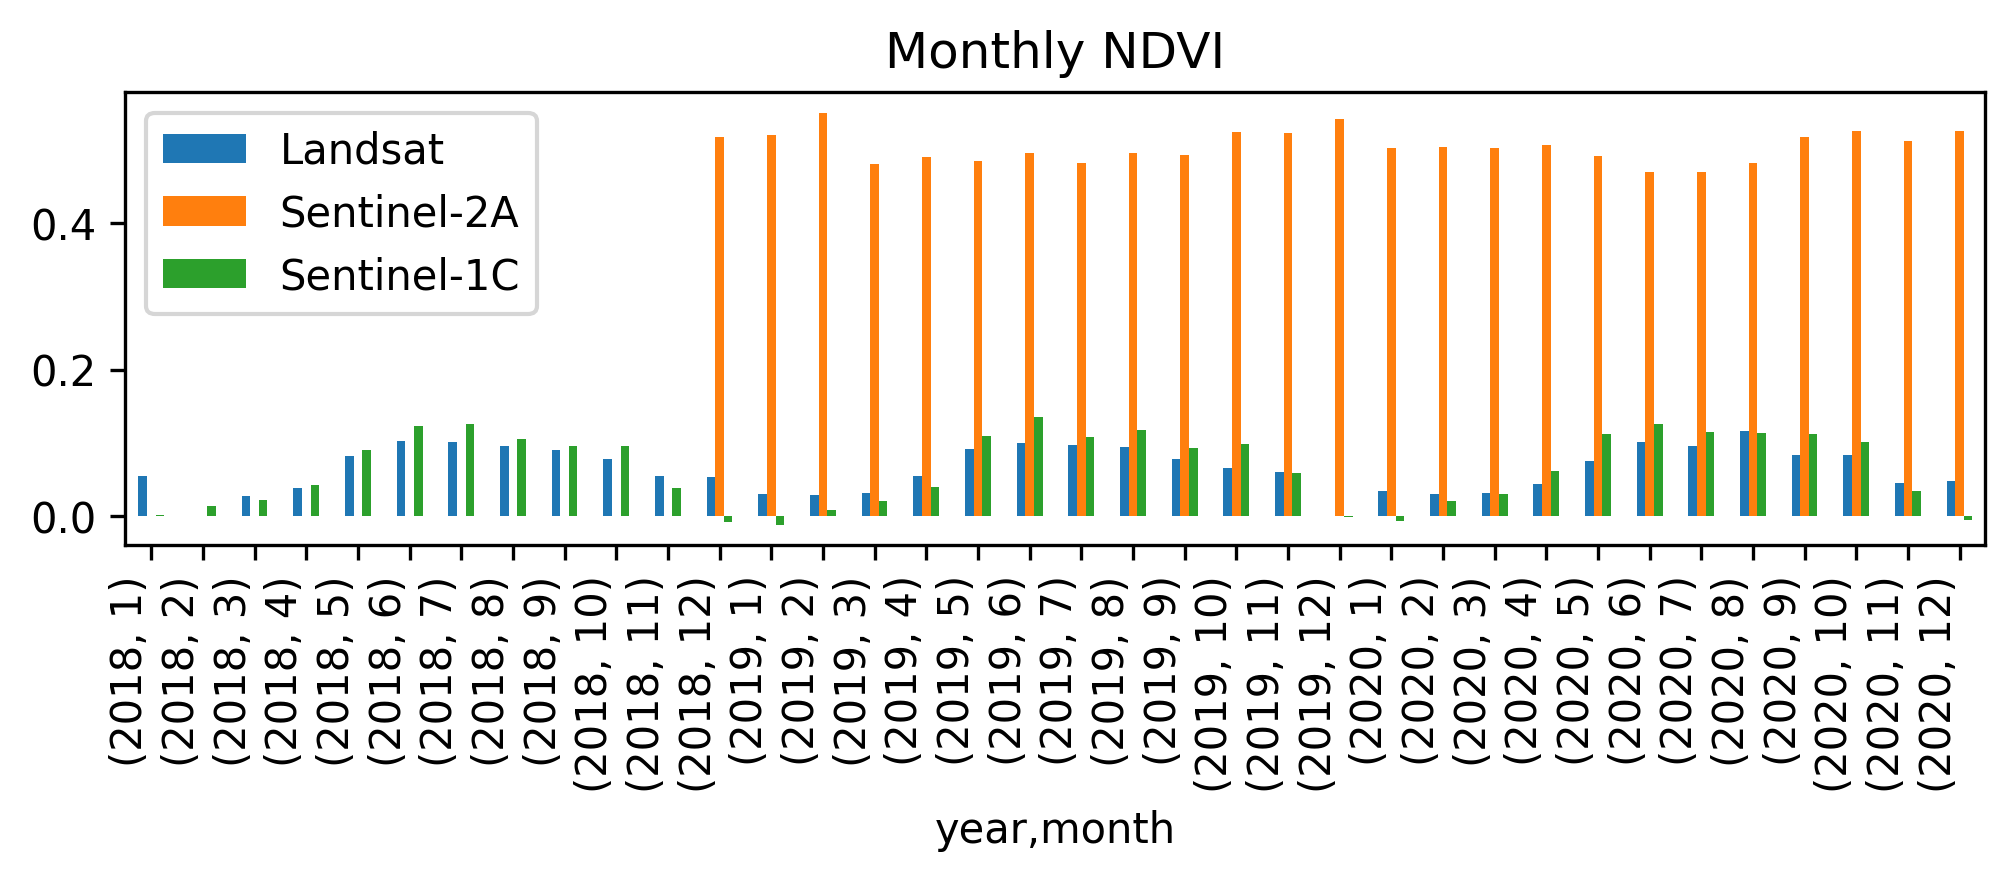

In [74]:
fig, axs = plt.subplots(1, 1, figsize=(8,2), dpi=300)

monthly_ndvi.plot(kind="bar", ax=axs)
plt.xticks(rotation=90, ha='right')
plt.title("Monthly NDVI")

plt.savefig('2d/satellite_ndvi_comparison.png',bbox_inches="tight")
plt.show()

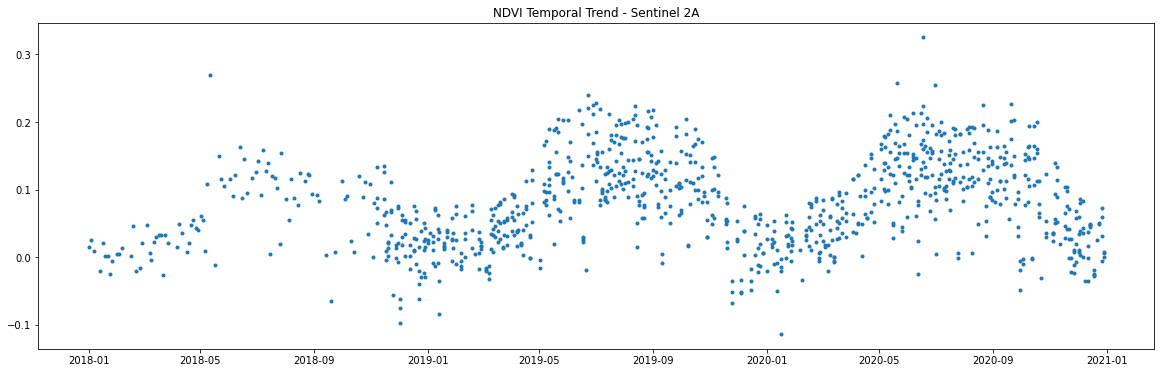

In [75]:
b1 = sentinel_1C[["date","NDVI"]]
b1 = b1.dropna().reset_index().drop(columns={"index"})

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(b1.groupby('date').mean(), '.')
plt.title("NDVI Temporal Trend - Sentinel 2A")
plt.show()

In [76]:
b1_grouped = b1.groupby(b1.date).count().reset_index()
b1_grouped

,date,NDVI
0,2018-01-01 16:01:22,10696
1,2018-01-03 15:46:51,2389
2,2018-01-06 15:56:30,10400
3,2018-01-13 15:46:08,9096
4,2018-01-16 16:01:06,3
...,...,...
982,2020-12-26 16:01:50,8
983,2020-12-26 16:02:01,1296
984,2020-12-28 15:51:45,56
985,2020-12-28 15:51:48,193


In [77]:
b1_grouped['month'] = b1_grouped.date.dt.month

In [78]:
b1_grouped

,date,NDVI,month
0,2018-01-01 16:01:22,10696,1
1,2018-01-03 15:46:51,2389,1
2,2018-01-06 15:56:30,10400,1
3,2018-01-13 15:46:08,9096,1
4,2018-01-16 16:01:06,3,1
...,...,...,...
982,2020-12-26 16:01:50,8,12
983,2020-12-26 16:02:01,1296,12
984,2020-12-28 15:51:45,56,12
985,2020-12-28 15:51:48,193,12


<AxesSubplot:>

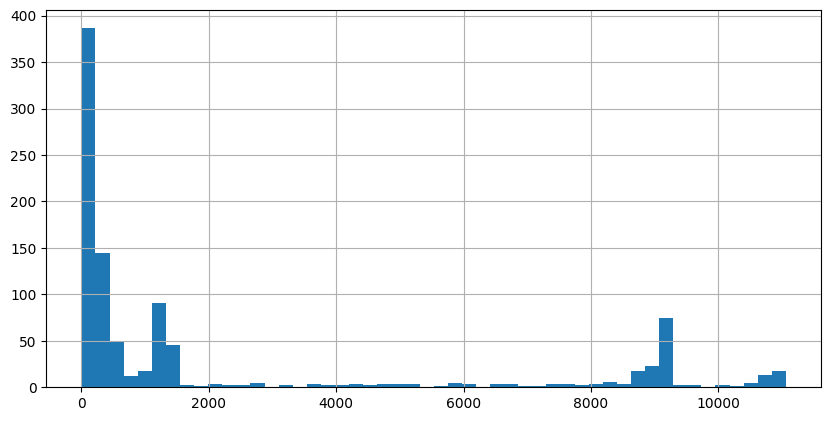

In [79]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
b1_grouped['NDVI'].hist(bins=50, ax=ax)

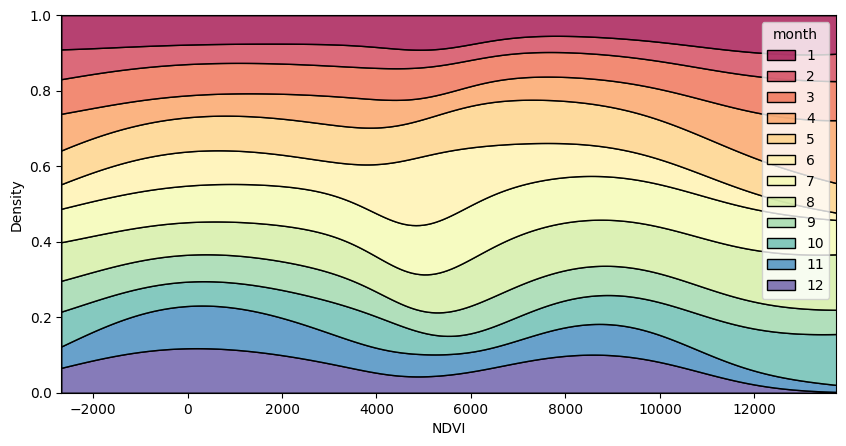

In [80]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
sns.kdeplot(
    data=b1_grouped,
    x="NDVI",
    hue="month",
    multiple="fill",
    palette="Spectral",
    ax=ax
)
plt.show()

[]

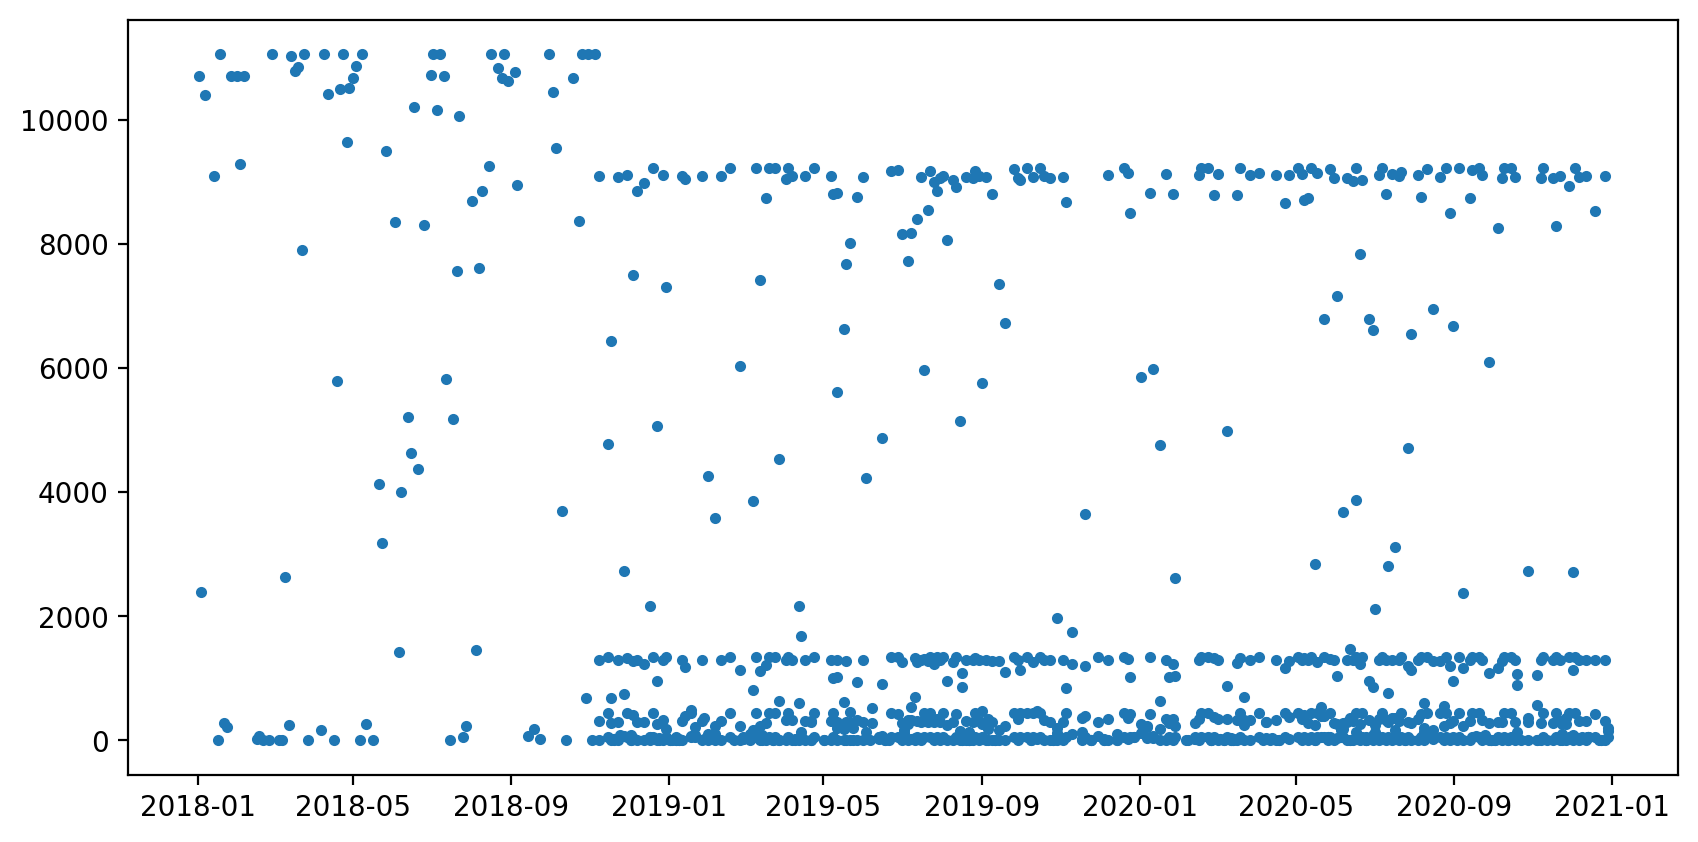

In [81]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.plot(b1_grouped['date'], b1_grouped['NDVI'], '.')
plt.plot(title="Sentinel-2A Count by Day")

In [82]:
sentinel_counts = sentinel_2A.groupby(['bbl','bin']).count().reset_index()
sentinel_counts

,bbl,bin,date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,month,year
0,1000020001,1085792,1194,108,109,109,109,109,109,109,109,109,109,109,109,109,1194,1194
1,1000080039,1078968,1194,0,0,0,0,0,0,0,0,0,0,0,0,0,1194,1194
2,1000080051,1090472,1194,0,0,0,0,0,0,0,0,0,0,0,0,0,1194,1194
3,1000090001,1000018,1194,112,113,113,113,113,113,113,113,113,113,113,113,113,1194,1194
4,1000090014,1000020,1194,112,113,113,113,113,113,113,113,113,113,113,113,113,1194,1194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,5078410154,5087579,1194,67,67,67,67,67,67,67,67,67,67,67,67,67,1194,1194
9246,5078940001,5088090,1194,68,68,68,68,68,68,68,68,68,68,68,68,68,1194,1194
9247,5078980001,5107854,1194,61,61,61,61,61,61,61,61,61,61,61,61,61,1194,1194
9248,5079710250,5107860,1194,83,83,83,83,83,83,83,83,83,83,83,83,83,1194,1194


In [83]:
sentinel_counts['percent_found'] = sentinel_counts['B1'] / sentinel_counts['date']
sentinel_percentages = sentinel_counts[['bbl','bin','percent_found']]
sentinel_percentages

,bbl,bin,percent_found
0,1000020001,1085792,0.090452
1,1000080039,1078968,0.000000
2,1000080051,1090472,0.000000
3,1000090001,1000018,0.093802
4,1000090014,1000020,0.093802
...,...,...,...
9245,5078410154,5087579,0.056114
9246,5078940001,5088090,0.056951
9247,5078980001,5107854,0.051089
9248,5079710250,5107860,0.069514


In [84]:
sentinel_counts

,bbl,bin,date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,month,year,percent_found
0,1000020001,1085792,1194,108,109,109,109,109,109,109,109,109,109,109,109,109,1194,1194,0.090452
1,1000080039,1078968,1194,0,0,0,0,0,0,0,0,0,0,0,0,0,1194,1194,0.000000
2,1000080051,1090472,1194,0,0,0,0,0,0,0,0,0,0,0,0,0,1194,1194,0.000000
3,1000090001,1000018,1194,112,113,113,113,113,113,113,113,113,113,113,113,113,1194,1194,0.093802
4,1000090014,1000020,1194,112,113,113,113,113,113,113,113,113,113,113,113,113,1194,1194,0.093802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,5078410154,5087579,1194,67,67,67,67,67,67,67,67,67,67,67,67,67,1194,1194,0.056114
9246,5078940001,5088090,1194,68,68,68,68,68,68,68,68,68,68,68,68,68,1194,1194,0.056951
9247,5078980001,5107854,1194,61,61,61,61,61,61,61,61,61,61,61,61,61,1194,1194,0.051089
9248,5079710250,5107860,1194,83,83,83,83,83,83,83,83,83,83,83,83,83,1194,1194,0.069514


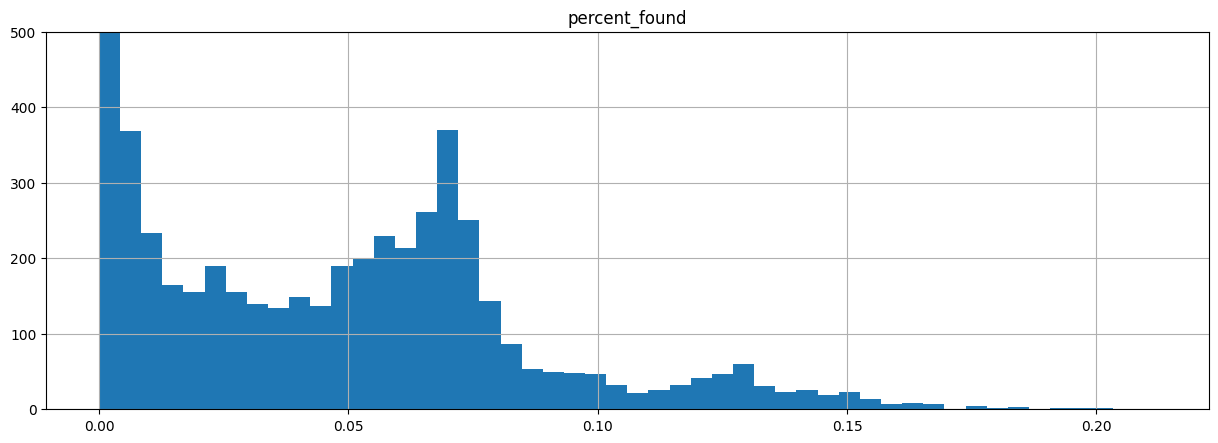

In [85]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)
sentinel_percentages.hist(bins=50, ax=ax)
plt.ylim(0,500)
plt.show()

In [86]:
sentinel_footcounts = pd.merge(footprints_ll, sentinel_counts, left_on=["bbl","bin"], right_on=["bbl","bin"]).fillna(0)
sentinel_footcounts

,bbl,bin,id,latitude,longitude,date,B1,B2,B3,B4,...,B7,B8,B8A,B9,B11,B12,NDVI,month,year,percent_found
0,1007640007,1013712,31a2a,40.739758,-74.001778,1194,0,0,0,0,...,0,0,0,0,0,0,0,1194,1194,0.000000
1,3050830044,3116615,152a6,40.653385,-73.956779,1194,0,0,0,0,...,0,0,0,0,0,0,0,1194,1194,0.000000
2,2033180015,2017499,092e2,40.869700,-73.895017,1194,94,95,95,95,...,95,95,95,95,95,95,95,1194,1194,0.078727
3,3074040001,3202112,9b415,40.594550,-73.951343,1194,2,2,2,2,...,2,2,2,2,2,2,2,1194,1194,0.001675
4,3050580057,3116089,b753d,40.652215,-73.964713,1194,69,70,70,70,...,70,70,70,70,70,70,70,1194,1194,0.057789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,3017130007,3421590,8cbbd,40.677413,-73.923052,1194,51,51,51,51,...,51,51,51,51,51,51,51,1194,1194,0.042714
9246,1008280059,1015659,27520,40.744560,-73.989475,1194,0,0,0,0,...,0,0,0,0,0,0,0,1194,1194,0.000000
9247,2029410001,2114529,5830f,40.840495,-73.897780,1194,103,104,104,104,...,104,104,104,104,104,104,104,1194,1194,0.086265
9248,4098750001,4211112,2ec2a,40.717143,-73.794127,1194,125,126,126,126,...,126,126,126,126,126,126,126,1194,1194,0.104690


In [87]:
np.mean(sentinel_footcounts.percent_found)

0.02646720086921092

In [88]:
sentinel_footcounts.to_csv(os.path.join(destination_dir, "sentinel_counts.csv"))

In [89]:
sentinel1C_counts = sentinel_1C.groupby(['bbl','bin']).count().reset_index()
sentinel1C_counts

,bbl,bin,date,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,month,year
0,1000020001,1085792,1738,214,214,214,214,214,214,214,214,214,214,214,214,214,1738,1738
1,1000080039,1078968,1738,210,210,210,210,210,210,210,210,210,210,210,210,210,1738,1738
2,1000080051,1090472,1738,210,210,210,210,210,210,210,210,210,210,210,210,210,1738,1738
3,1000090001,1000018,1738,212,212,212,212,212,212,212,212,212,212,212,212,212,1738,1738
4,1000090014,1000020,1738,211,211,211,211,211,211,211,211,211,211,211,211,211,1738,1738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,5078410154,5087579,1738,202,202,202,202,202,202,202,202,202,202,202,202,202,1738,1738
9246,5078940001,5088090,1738,204,204,204,204,204,204,204,204,204,204,204,204,204,1738,1738
9247,5078980001,5107854,1738,203,203,203,203,203,203,203,203,203,203,203,203,203,1738,1738
9248,5079710250,5107860,1738,200,200,200,200,200,200,200,200,200,200,200,200,200,1738,1738


In [90]:
sentinel1C_counts['percent_found'] = sentinel1C_counts['B1'] / sentinel1C_counts['date']
sentinel1C_percentages = sentinel1C_counts[['bbl','bin','percent_found']]
sentinel1C_percentages

,bbl,bin,percent_found
0,1000020001,1085792,0.123130
1,1000080039,1078968,0.120829
2,1000080051,1090472,0.120829
3,1000090001,1000018,0.121979
4,1000090014,1000020,0.121404
...,...,...,...
9245,5078410154,5087579,0.116226
9246,5078940001,5088090,0.117376
9247,5078980001,5107854,0.116801
9248,5079710250,5107860,0.115075


In [91]:
sentinel1C_footcounts = pd.merge(footprints_ll, sentinel1C_percentages, left_on=["bbl","bin"], right_on=["bbl","bin"]).fillna(0)
sentinel1C_footcounts

,bbl,bin,id,latitude,longitude,percent_found
0,1007640007,1013712,31a2a,40.739758,-74.001778,0.116801
1,3050830044,3116615,152a6,40.653385,-73.956779,0.119102
2,2033180015,2017499,092e2,40.869700,-73.895017,0.117952
3,3074040001,3202112,9b415,40.594550,-73.951343,0.238780
4,3050580057,3116089,b753d,40.652215,-73.964713,0.121979
...,...,...,...,...,...,...
9245,3017130007,3421590,8cbbd,40.677413,-73.923052,0.116801
9246,1008280059,1015659,27520,40.744560,-73.989475,0.112198
9247,2029410001,2114529,5830f,40.840495,-73.897780,0.116801
9248,4098750001,4211112,2ec2a,40.717143,-73.794127,0.243959


In [92]:
np.mean(sentinel1C_footcounts.percent_found)

0.1395238391440923

In [93]:
sentinel1C_footcounts.to_csv(os.path.join(destination_dir, "sentinel_1C_counts.csv"))